In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scip

df1 = pd.read_csv('steps.csv', sep=";")
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [16]:
dfmer = pd.merge(df1, df2, on = 'id') #'id' is the common identifier dfmer.head()
dfmer

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,NaN,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,NaN,NaN,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,NaN,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,NaN,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,NaN,NaN,Lille,Female,55-64,1,1,High school,172.0,65.0


In [17]:
dfmer = dfmer.fillna(0)
dfmer

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,0.0,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,0.0,0.0,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,0.0,0.0,0.0,1623.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,0.0,0.0,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,0.0,0.0,Lille,Female,55-64,1,1,High school,172.0,65.0


In [18]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
dfmer['weight'] = dfmer['weight'].apply(pd.to_numeric, errors='coerce')
dfmer['height'] = dfmer['height'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 170.0 and below 40.0 we need to create a function that we then apply to the entire column
def filterweight(x):
    if(x < 170.0 and x > 45 ): 
        return x
    else: 
        return float('NaN')
                    
def filterheight(x):
    if(x < 210.0 and x > 140.0 ): 
        return x
    else: 
        return float('NaN')

    
dfmer['weight'] = dfmer['weight'].apply(filterweight)
dfmer['height'] = dfmer['height'].apply(filterheight)


In [19]:
# calculate some statistics for height
print('median: ' + str(float(dfmer[['height']].median())))
print('mode: ' + str(dfmer[['height']].mode()['height'][0]))
print('mean: ' + str(float(dfmer[['height']].mean())))
print('standard deviation: ' + str(float(dfmer[['height']].std())))
print('variance: ' + str(float(dfmer[['height']].var())))

median: 172.0
mode: 170.0
mean: 171.66810344827587
standard deviation: 9.080235412579503
variance: 82.45067514786287


In [20]:
mean_steps = dfmer.loc[:,"20-6-2013":"13-5-2014"].mean(axis = 1).to_frame() #get the mean over the columns (all the dates) 
#and store
mean_steps.index #the indexes now contain the dates

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            919, 920, 921, 922, 923, 924, 925, 926, 927, 928],
           dtype='int64', length=929)

In [21]:
mean_steps

,0
0,5133.875000
1,2826.371951
2,3745.902439
3,221.536585
4,874.557927
...,...
924,1742.908537
925,731.689024
926,6268.954268
927,3872.115854


In [22]:
#mean_steps.columns

In [23]:
mean_steps.rename(columns={0:'mean_steps'}, inplace = True)
#mean_steps = mean_steps.rename  is used for inplace=true

In [24]:
def filtermeansteps(x):
    if(x > 100000.0 or x < 1500.0 ): 
        return float('NaN')
    else: 
        return x
#def filtermeansteps(x):
    #if(x < 100000.0): 
        #return x
    #else: 
        #return  float('NaN')
    
mean_steps["mean_steps"] = mean_steps["mean_steps"].apply(filtermeansteps)

In [25]:
mean_steps["mean_steps"].sort_values().dropna()

829     1513.137195
244     1524.460366
411     1531.265244
404     1534.006098
466     1535.125000
           ...     
481    13051.253049
95     13196.155488
907    13775.759146
205    14538.682927
109    19430.237805
Name: mean_steps, Length: 487, dtype: float64

In [26]:
df3 = dfmer.loc[:,['id','weight','height']] #making a newdf for just weight and height

In [27]:
df3, mean_steps

(      id  weight  height
 0      1    98.0   178.0
 1      2    77.0   180.0
 2      3    83.0   180.0
 3      4    80.0   178.0
 4      5    61.0   167.0
 ..   ...     ...     ...
 924  925    59.0   165.0
 925  926    90.0   192.0
 926  927    71.0   181.0
 927  928    65.0   172.0
 928  929    76.0   180.0
 
 [929 rows x 3 columns],
       mean_steps
 0    5133.875000
 1    2826.371951
 2    3745.902439
 3            NaN
 4            NaN
 ..           ...
 924  1742.908537
 925          NaN
 926  6268.954268
 927  3872.115854
 928  3167.902439
 
 [929 rows x 1 columns])

In [28]:
dfmer2 = pd.merge(df3,mean_steps, left_index=True, right_index=True)
dfmer2

,id,weight,height,mean_steps
0,1,98.0,178.0,5133.875000
1,2,77.0,180.0,2826.371951
2,3,83.0,180.0,3745.902439
3,4,80.0,178.0,NaN
4,5,61.0,167.0,NaN
...,...,...,...,...
924,925,59.0,165.0,1742.908537
925,926,90.0,192.0,NaN
926,927,71.0,181.0,6268.954268
927,928,65.0,172.0,3872.115854


In [29]:
df3

,id,weight,height
0,1,98.0,178.0
1,2,77.0,180.0
2,3,83.0,180.0
3,4,80.0,178.0
4,5,61.0,167.0
...,...,...,...
924,925,59.0,165.0
925,926,90.0,192.0
926,927,71.0,181.0
927,928,65.0,172.0


In [30]:
dfmer2

,id,weight,height,mean_steps
0,1,98.0,178.0,5133.875000
1,2,77.0,180.0,2826.371951
2,3,83.0,180.0,3745.902439
3,4,80.0,178.0,NaN
4,5,61.0,167.0,NaN
...,...,...,...,...
924,925,59.0,165.0,1742.908537
925,926,90.0,192.0,NaN
926,927,71.0,181.0,6268.954268
927,928,65.0,172.0,3872.115854


In [31]:
corr = dfmer2[['weight', 'mean_steps', 'height']].corr() 
corr
#it shows that meansteps and weight are inversely proportional

,weight,mean_steps,height
weight,1.000000,-0.073300,0.496814
mean_steps,-0.073300,1.000000,-0.156677
height,0.496814,-0.156677,1.000000


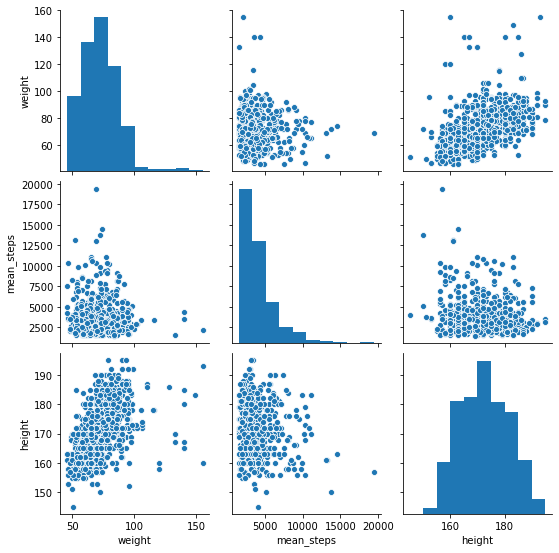

In [32]:
pairplot1= dfmer2[['weight', 'mean_steps', 'height']]
sns.pairplot(pairplot1)
plt.show()

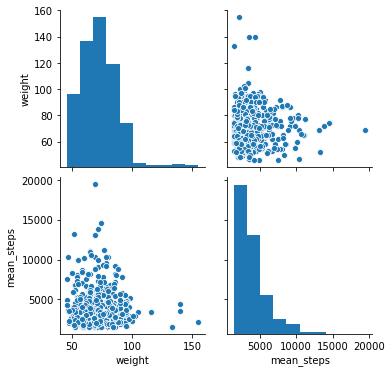

In [33]:
pairplot2= dfmer2[['weight', 'mean_steps']]
sns.pairplot(pairplot2)
plt.show()

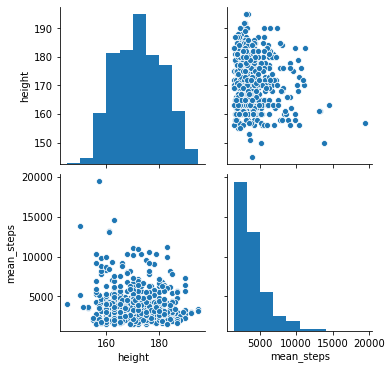

In [34]:
pairplot3= dfmer2[['height', 'mean_steps']]
sns.pairplot(pairplot3)
plt.show()

In [35]:
dfmer2.corr()

,id,weight,height,mean_steps
id,1.000000,-0.002019,0.028926,0.038542
weight,-0.002019,1.000000,0.496814,-0.073300
height,0.028926,0.496814,1.000000,-0.156677
mean_steps,0.038542,-0.073300,-0.156677,1.000000


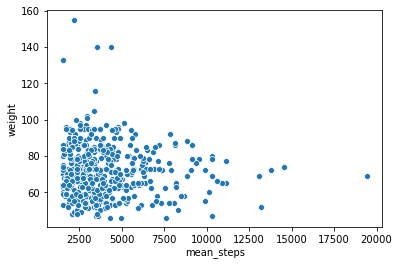

In [36]:
sns.scatterplot(data=dfmer2, x="mean_steps", y="weight")

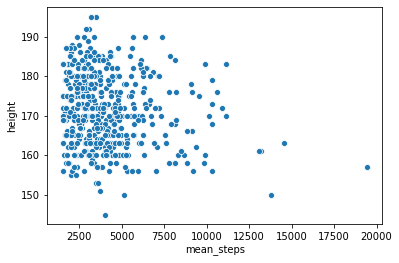

In [37]:
sns.scatterplot(data=dfmer2, x="mean_steps", y="height")

In [38]:
print(pearsonr(dfmer2['weight'].fillna(0),dfmer2['mean_steps'].fillna(0))) #We will need the correlation function from the scientific package scipy
print(pearsonr(dfmer2['height'].fillna(0),dfmer2['mean_steps'].fillna(0))) ### ASK THE IMPORTANCE OF PEARSONR TO JONAS??????

(-0.11026784012044422, 0.0007608580943471879)
(-0.06080118100530261, 0.06396717194659499)


In [39]:
dfmer2["height"].sort_values()

303    145.0
907    150.0
67     150.0
875    151.0
330    152.0
       ...  
549    193.0
212    195.0
918    195.0
38     195.0
261      NaN
Name: height, Length: 929, dtype: float64

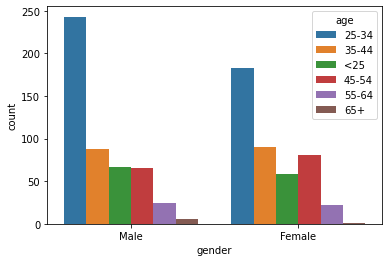

In [40]:
sns.countplot(x="gender", hue="age", data=dfmer)
plt.show()

In [41]:
dfmer3 = pd.merge(dfmer2, dfmer["gender"], left_index = True, right_index = True) #'id' is the common identifier dfmer.head()
dfmer3

,id,weight,height,mean_steps,gender
0,1,98.0,178.0,5133.875000,Male
1,2,77.0,180.0,2826.371951,Male
2,3,83.0,180.0,3745.902439,Male
3,4,80.0,178.0,NaN,Male
4,5,61.0,167.0,NaN,Female
...,...,...,...,...,...
924,925,59.0,165.0,1742.908537,Female
925,926,90.0,192.0,NaN,Male
926,927,71.0,181.0,6268.954268,Male
927,928,65.0,172.0,3872.115854,Female


In [42]:
#dfmer3 = pd.merge(dfmer2, dfmer.loc[:,["id","gender"]], on='id') #'id' is the common identifier dfmer.head()
#dfmer3 second option for the previous code

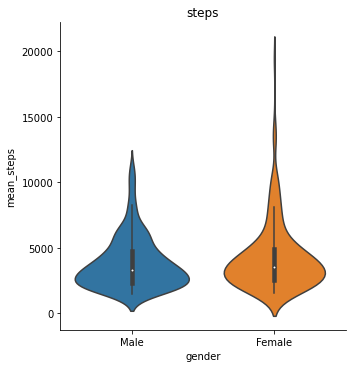

In [43]:
sns.catplot(x="gender", y="mean_steps", kind="violin", data=dfmer3)
plt.title('steps')
plt.show()

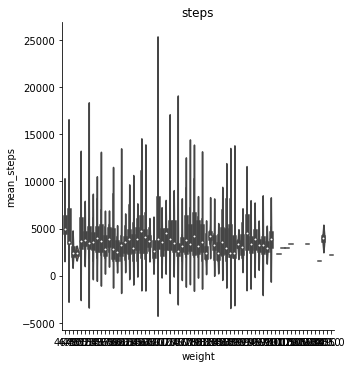

In [44]:
sns.catplot(x="weight", y="mean_steps", kind="violin", data=dfmer3)
plt.title('steps')
plt.show()

In [51]:
pd.crosstab(dfmer["gender"], dfmer["age"], normalize="columns") #Cross table with relevant percentages

age,25-34,35-44,45-54,55-64,65+,<25
gender,,,,,,
Female,0.429577,0.505618,0.55102,0.478261,0.142857,0.464
Male,0.570423,0.494382,0.44898,0.521739,0.857143,0.536


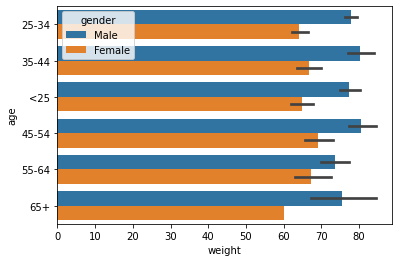

In [53]:
ax = sns.barplot(x="weight", y="age", hue="gender", data=dfmer)
ax